# DATASCIENCE INTERNSHIP


# sentiment analysis

In [65]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')


import os, sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [66]:
# Importing the csv file

df = pd.read_csv("C:\\Users\\Pooja\\Desktop\\codeclause\\task 3 -sentimental any\\data\\training.1600000.processed.noemoticon.csv",delimiter=',', encoding='ISO-8859-1')

In [67]:
# First 5 row of dataset
df.head()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [68]:
# last 5 row of dataset
df.tail()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
1048567,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048568,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048569,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
1048570,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?
1048571,4,1960186607,Fri May 29 07:33:45 PDT 2009,NO_QUERY,sugababez,cant wait til her date this weekend


In [69]:
# shape of the dataset
df.shape

(1048572, 6)

In [70]:
# to check for duplicate values
df.duplicated().sum()

0

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048572 entries, 0 to 1048571
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   polarity of tweet   1048572 non-null  int64 
 1   id of the tweet     1048572 non-null  int64 
 2   date of the tweet   1048572 non-null  object
 3   query               1048572 non-null  object
 4   user                1048572 non-null  object
 5   text of the tweet   1048572 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [72]:
# Is there any null values is the dataset
df.isnull().sum()

polarity of tweet     0
id of the tweet       0
date of the tweet     0
query                 0
user                  0
text of the tweet     0
dtype: int64

In [73]:
df.columns

Index(['polarity of tweet ', 'id of the tweet', 'date of the tweet', 'query',
       'user', 'text of the tweet '],
      dtype='object')

In [74]:
df.columns=['sentiment','id','date','query','username','text']

In [75]:
df.head()

,sentiment,id,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [76]:
df.shape

(1048572, 6)

In [77]:
df['sentiment'].value_counts()

0    799996
4    248576
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='Count'>

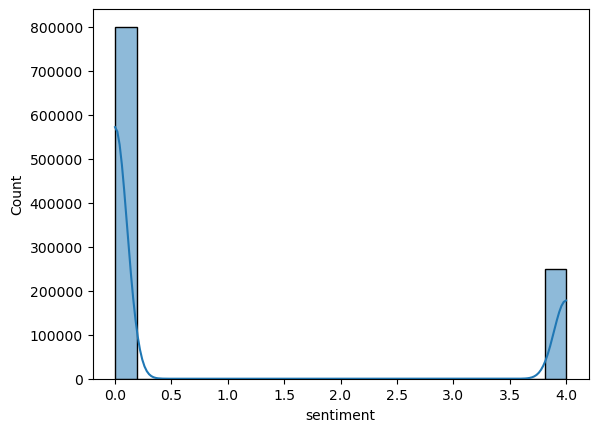

In [78]:
sns.histplot(df['sentiment'],kde=True)

<AxesSubplot:xlabel='sentiment', ylabel='Count'>

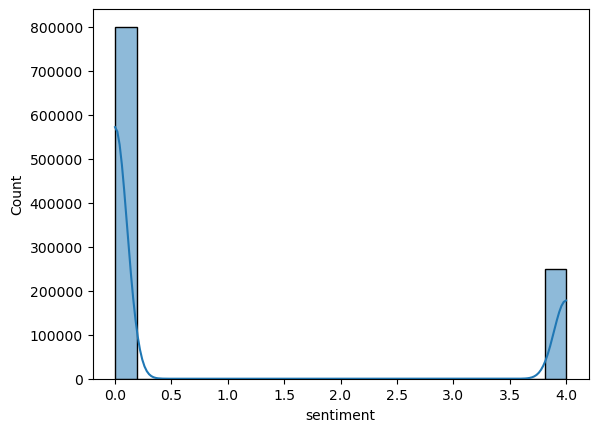

In [79]:
sns.histplot(df['sentiment'],kde=True)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

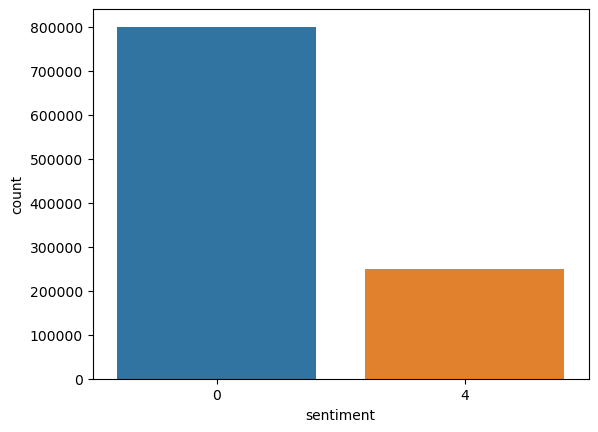

In [80]:
sns.countplot(df['sentiment'])

The data is unbalanced therfore we will downsample the data to have same count for each sentiment

In [81]:
df['query'].value_counts()

NO_QUERY    1048572
Name: query, dtype: int64

In [82]:
df=df.drop(columns=['query'])

In [83]:
df.head()

,sentiment,id,date,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


In [84]:
texts = df['text']

In [85]:
text_lens = [len(t.split()) for t in texts.values]
len_mean = np.mean(text_lens)

# EDA

In [86]:
x=df.corr()
x

,sentiment,id
sentiment,1.000000,-0.571528
id,-0.571528,1.000000


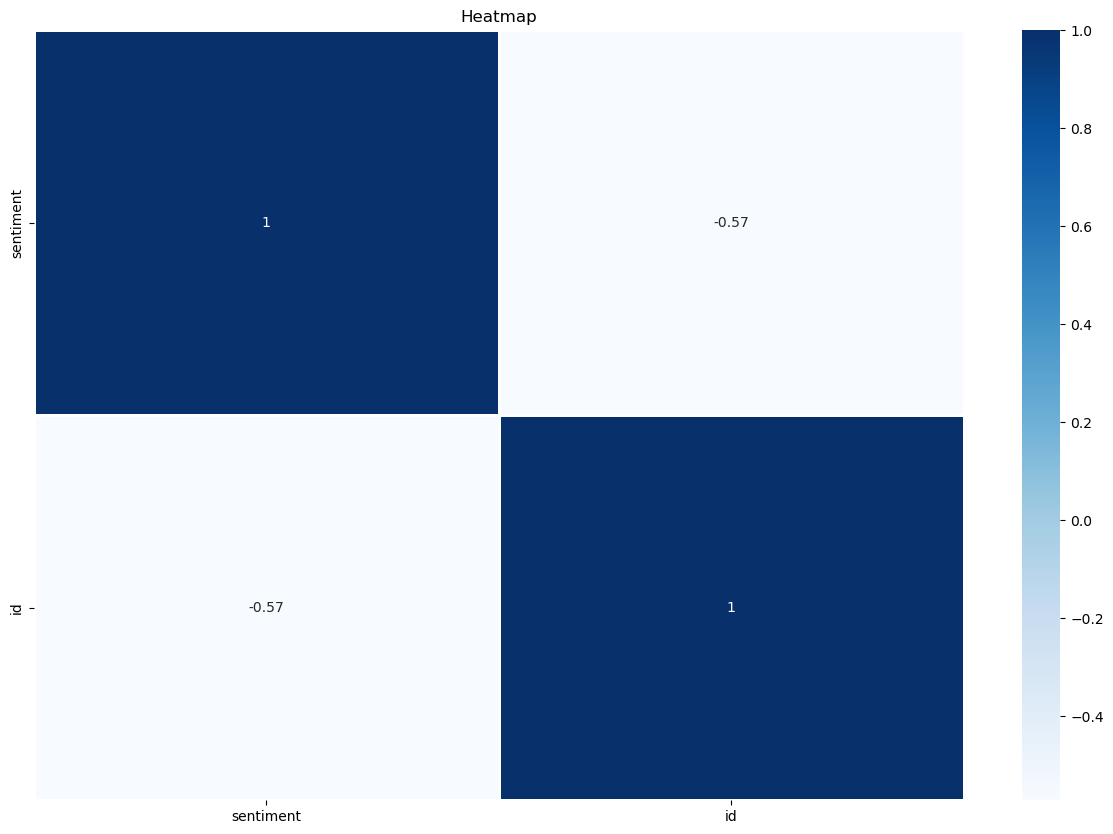

In [87]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(x,linewidth=1,annot=True,cmap=plt.cm.Blues)
plt.title("Heatmap")
plt.show()

# sentiment and id has strong positive relationship.

In [88]:
df.dtypes

sentiment     int64
id            int64
date         object
username     object
text         object
dtype: object

In [89]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [90]:
df.date=le.fit_transform(df.date)
df.username=le.fit_transform(df.username)
df.text =le.fit_transform(df.text)

In [91]:
df.dtypes

sentiment    int64
id           int64
date         int32
username     int32
text         int32
dtype: object

In [92]:
df.skew()

sentiment    1.236544
id          -0.387667
date         0.005225
username     0.001458
text        -0.009471
dtype: float64

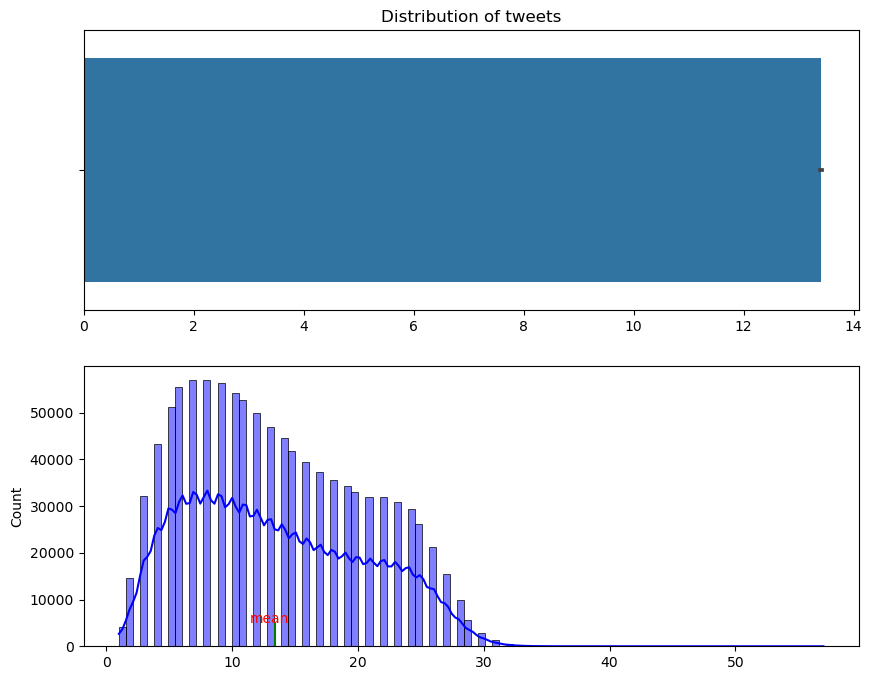

In [93]:
fig, axes = plt.subplots(2,1, figsize=(10, 8))
axes[0].set_title('Distribution of tweets')
sns.barplot(text_lens, ax=axes[0])
sns.histplot(text_lens,bins=100, kde=True, ax=axes[1],color='blue')
axes[1].vlines(len_mean, 0, 5000, color = 'g')
plt.annotate("mean", xy=(len_mean, 5000), xytext=(len_mean-2, 5050),color='r')
plt.show()

# spliting into test & train

In [94]:
x=df.iloc[:,0:4]
y=df.iloc[:,-1]

In [95]:
import sklearn 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=42)

In [96]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((734000, 4), (314572, 4), (734000,), (314572,))

# Model Building

In [97]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [98]:
def metrics(y_train,y_train_pred,y_test,y_test_pred):
  print("training accuracy = ",round(accuracy_score(y_train,y_train_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize = 'all')
  print(classification_report(y_train,y_train_pred))
  plt.show()

  print("testing accuracy = ",round(accuracy_score(y_test,y_test_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,normalize = 'all')
  print(classification_report(y_test,y_test_pred))
  plt.show()

In [99]:
import sklearn 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [100]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [101]:
# Using Logistic Regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)
#LogisticRegression()
#pred_lr=LR.predict(x_test)
#LR.score(x_test, y_test)

In [103]:
model=LogisticRegression()
model.fit(x_train,y_train)

MemoryError: Unable to allocate 5.06 TiB for an array with shape (838857, 829797) and data type int64